<a href="https://colab.research.google.com/github/KimYongHwi/machine-learning-study/blob/main/decision_tree/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 결정 트리(Decision Tree)
- 분류와 회귀에 사용되는 지도 학습 방법
- 데이터 특승으로 부터 추론된 결정 규칙을 통해 값을 예측
- **if-then-else** 결정 규칙을 통해 데이터 학습
- 트리의 깊이가 깊을 수록 복잡한 모델
- 결정 트리 장점
  - 이해와 해석이 쉽다.
  - 시각화가 용이하다.
  - 많은 데이터 전처리가 필요하지 않다.
  - 수치형과 범주형 데이터 모두를 다룰 수 있다.
  - ...

In [1]:
import pandas as pd
import numpy as np
import graphviz
import multiprocessing
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [2]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
from sklearn.datasets import load_boston, load_diabetes
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

## 분류를 위한 데이터

### 1. Iris 데이터

In [3]:
iris = load_iris()

In [4]:
iris_df = pd.DataFrame(data = iris.data, columns= iris.feature_names)
iris_df['target'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### 2. Wine 데이터


In [5]:
wine = load_wine()

In [6]:
wine_df = pd.DataFrame(data = wine.data, columns = wine.feature_names)
wine_df['target'] = wine.target
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


### 3. Breast cancer 데이터

In [7]:
cancer = load_breast_cancer()

In [8]:
cancer_df = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)
cancer_df['target'] = cancer.target
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


## 회귀를 위한 데이터

### 1. 보스턴 주택 가격 데이터

In [9]:
boston = load_boston()

In [10]:
boston_df = pd.DataFrame(data = boston.data, columns = boston.feature_names)
boston_df['target'] = boston.target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


### 2. 당뇨병 데이터

In [11]:
diabetes = load_diabetes()

In [12]:
diabetes_df = pd.DataFrame(data = diabetes.data, columns = diabetes.feature_names)
diabetes_df['target'] = diabetes.target
diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


## 분류 - DecisionTreeClassifier()
- DecisionTreeClassifier는 분류를 위한 결정트리 모델
- 두개의 배열 X, y를 입력 받음
  - X는 [n_samples, n_features] 크기의 데이터 특성 배열
  - y는 [n_samples] 크기의 정답 배열

In [13]:
X = [[0, 0], [1, 1]]
y = [0, 1]

model = tree.DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [14]:
model.predict([[2.,2.]])

array([1])

In [15]:
# 불확실성을 추정할 수 있는 함수
# 출력은 각 클래스에 대한 확률
# 확률이기 때문에 predict_proba의 출력은 항상 0과 1 사이의 값이며 두 클래스에 대한 확률의 합은 항상 1입니다.
model.predict_proba([[2.,2.]])

array([[0., 1.]])

## Iris 데이터 학습

#### 1. 전처리 없이 학습

In [16]:
model = DecisionTreeClassifier

In [17]:
"""
교차 검증
- k=5일 때, 데이터를 5개의 부분 집합으로 분할한 후, 각 분할마다 하나의 폴드를 테스트용으로 사용하고 나머지 4개의 폴드는 훈련용으로 쓴다. 
- 이 과정을 반복하여 각 분할마다 정확도를 측정한다.
"""
cross_val = cross_val_score(
    estimator = model,
    X = iris.data,
    y = iris.target,
    cv = 5, # cross validation
    n_jobs = multiprocessing.cpu_count()
)

TypeError: ignored

In [18]:
# 교차 검증 평균
cross_val.mean()

NameError: ignored

#### 2. 전처리 후 학습
- Decision tree는 규칙을 학습하기 때문에 전처리에 큰 영향을 받지 않는다.

In [ ]:
model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

In [19]:
cross_val = cross_val_score(
    estimator = model,
    X = iris.data,
    y = iris.target,
    cv = 5, # cross validation
    n_jobs = multiprocessing.cpu_count()
)

TypeError: ignored

In [ ]:
cross_val.mean()

#### 3. 학습된 결정 트리 시각화

In [20]:
model = DecisionTreeClassifier()
model.fit(iris.data, iris.target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### 텍스트를 통한 시각화

In [21]:
r = tree.export_text(
    decision_tree = model,
    feature_names = iris.feature_names
)

print(r)

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- sepal length (cm) <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepal length (cm) >  6.95
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal length (cm) <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- sepal length (cm) >  5.95
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



#### plot_tree를 사용한 시각화

[Text(167.4, 199.32, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.5230

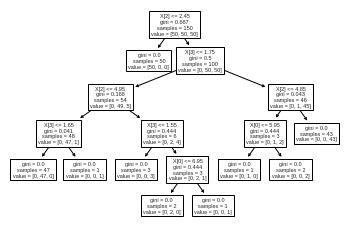

In [22]:
tree.plot_tree(decision_tree = model)

#### graphviz를 사용한 시각화

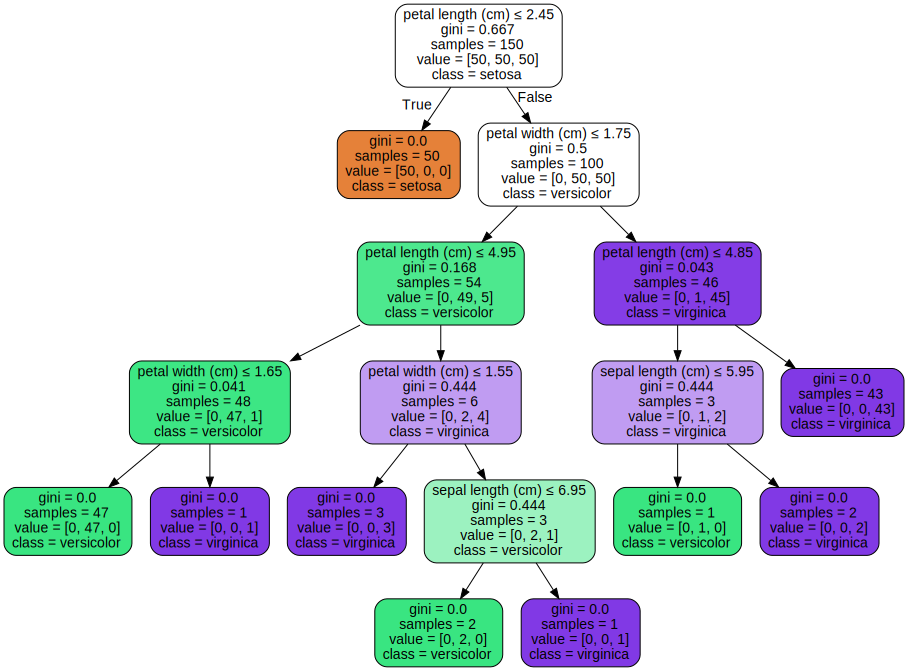

In [23]:
dot_data = tree.export_graphviz(
    decision_tree=model,
    feature_names = iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    rounded=True,
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph

## gini

#### 결정 경계 시각화

In [24]:
n_classes = 3
plot_colors = 'ryb'
plot_step = 0.02

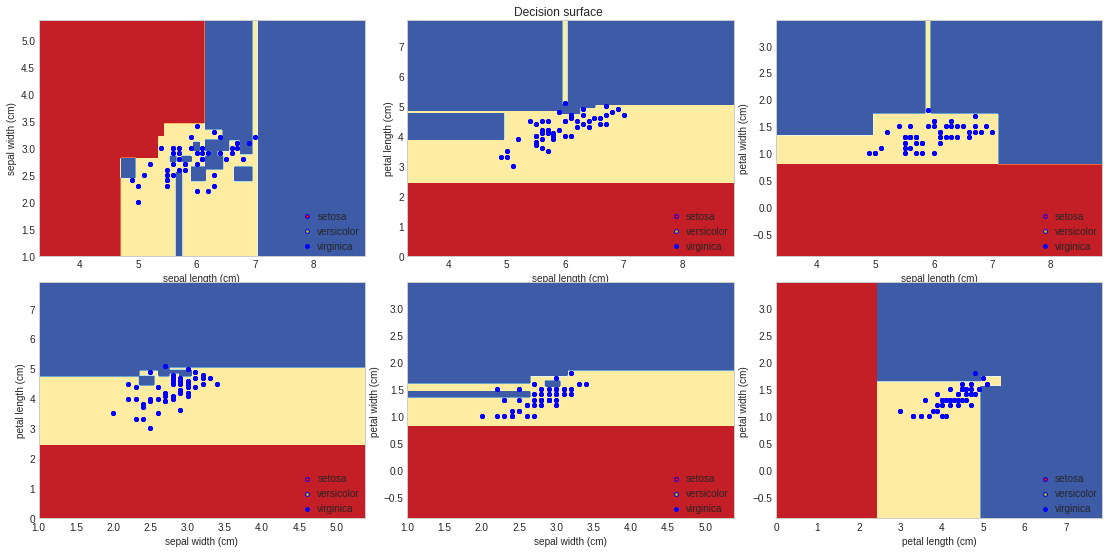

In [25]:
plt.figure(figsize=(16, 8))

for pairIdx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    X = iris.data[:, pair]
    y = iris.target

    model = DecisionTreeClassifier()
    model.fit(X, y)

    plt.subplot(2, 3, pairIdx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    
    plt.tight_layout(h_pad = -0.5, w_pad = 0.5, pad = 2.5)

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap = plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y==1)
        plt.scatter(
            X[idx, 0], 
            X[idx, 1],
            c = color,
            label = iris.target_names[i],
            cmap = plt.cm.RdYlBu,
            edgecolor = 'b',
            s = 15)

    plt.suptitle('Decision surface')
    plt.legend(loc = 'lower right', borderpad = 0, handletextpad = 0)
    plt.axis('tight')

## Wine 데이터 학습

#### 전처리 없이 학습

In [26]:
model = DecisionTreeClassifier()

In [27]:
cross_val = cross_val_score(
    estimator = model,
    X = wine.data,
    y = wine.target,
    cv = 5,
    n_jobs = multiprocessing.cpu_count()
)

In [28]:
cross_val

array([0.91666667, 0.77777778, 0.86111111, 0.91428571, 0.85714286])

In [29]:
cross_val.mean()

0.8653968253968254

#### 전처리 후 학습

In [30]:
model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

In [31]:
cross_val = cross_val_score(
    estimator = model,
    X = wine.data,
    y = wine.target,
    cv = 5,
    n_jobs = multiprocessing.cpu_count()
)

In [32]:
cross_val

array([0.91666667, 0.88888889, 0.91666667, 0.91428571, 0.85714286])

In [33]:
cross_val.mean()

0.8987301587301586

### 학습된 Decision tree 시각화

In [34]:
model = DecisionTreeClassifier()
model.fit(wine.data, wine.target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### 텍스트를 통한 시각화

In [35]:
r = tree.export_text(decision_tree=model, feature_names=wine.feature_names)

In [36]:
print(r)

|--- proline <= 755.00
|   |--- od280/od315_of_diluted_wines <= 2.11
|   |   |--- hue <= 0.94
|   |   |   |--- flavanoids <= 1.58
|   |   |   |   |--- class: 2
|   |   |   |--- flavanoids >  1.58
|   |   |   |   |--- class: 1
|   |   |--- hue >  0.94
|   |   |   |--- flavanoids <= 0.56
|   |   |   |   |--- class: 2
|   |   |   |--- flavanoids >  0.56
|   |   |   |   |--- class: 1
|   |--- od280/od315_of_diluted_wines >  2.11
|   |   |--- flavanoids <= 0.80
|   |   |   |--- class: 2
|   |   |--- flavanoids >  0.80
|   |   |   |--- alcohol <= 13.17
|   |   |   |   |--- class: 1
|   |   |   |--- alcohol >  13.17
|   |   |   |   |--- alcohol <= 13.36
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- alcohol >  13.36
|   |   |   |   |   |--- class: 1
|--- proline >  755.00
|   |--- flavanoids <= 2.17
|   |   |--- flavanoids <= 0.90
|   |   |   |--- class: 2
|   |   |--- flavanoids >  0.90
|   |   |   |--- class: 1
|   |--- flavanoids >  2.17
|   |   |--- magnesium <= 135.50
|   |   |  

[Text(189.42631578947368, 199.32, 'X[12] <= 755.0\ngini = 0.658\nsamples = 178\nvalue = [59, 71, 48]'),
 Text(114.53684210526316, 163.07999999999998, 'X[11] <= 2.115\ngini = 0.492\nsamples = 111\nvalue = [2, 67, 42]'),
 Text(70.48421052631579, 126.83999999999999, 'X[10] <= 0.935\ngini = 0.227\nsamples = 46\nvalue = [0, 6, 40]'),
 Text(35.242105263157896, 90.6, 'X[6] <= 1.58\ngini = 0.049\nsamples = 40\nvalue = [0, 1, 39]'),
 Text(17.621052631578948, 54.359999999999985, 'gini = 0.0\nsamples = 39\nvalue = [0, 0, 39]'),
 Text(52.863157894736844, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(105.72631578947369, 90.6, 'X[6] <= 0.565\ngini = 0.278\nsamples = 6\nvalue = [0, 5, 1]'),
 Text(88.10526315789474, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(123.34736842105264, 54.359999999999985, 'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0]'),
 Text(158.58947368421053, 126.83999999999999, 'X[6] <= 0.795\ngini = 0.117\nsamples = 65\nvalue = [2, 6

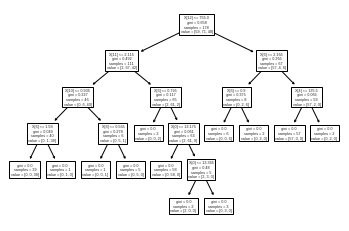

In [37]:
tree.plot_tree(model)

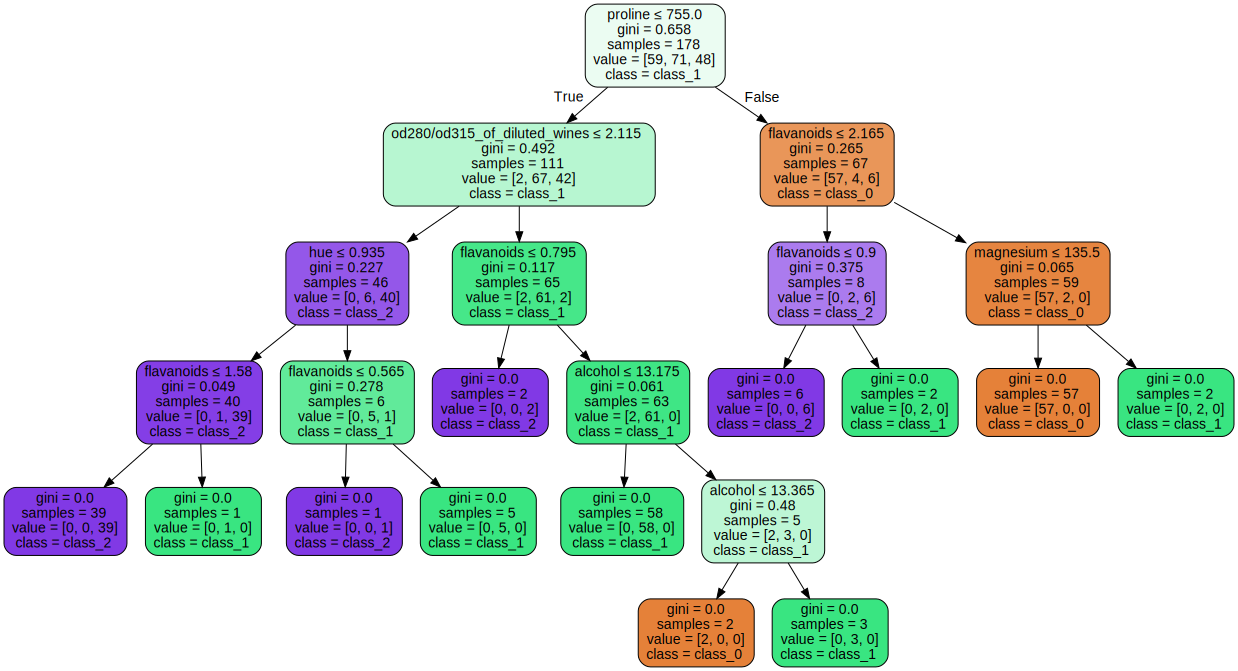

In [38]:
dot_data = tree.export_graphviz(
    decision_tree=model,
    feature_names=wine.feature_names,
    class_names=wine.target_names,
    filled=True,
    rounded=True,
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph

### 시각화

In [39]:
n_classes = 3
plot_colors = 'ryb'
plot_step = 0.02

#### 결정 경계 시각화

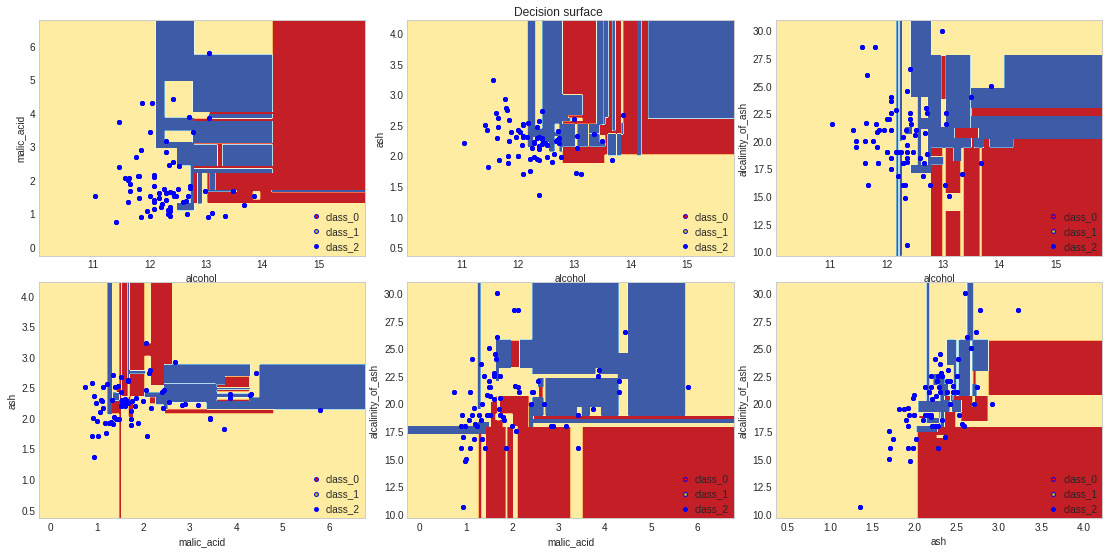

In [40]:
plt.figure(figsize=(16, 8))

for pairIdx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    X = wine.data[:, pair]
    y = wine.target

    model = DecisionTreeClassifier()
    model.fit(X, y)

    plt.subplot(2, 3, pairIdx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    
    plt.tight_layout(h_pad = -0.5, w_pad = 0.5, pad = 2.5)

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap = plt.cm.RdYlBu)

    plt.xlabel(wine.feature_names[pair[0]])
    plt.ylabel(wine.feature_names[pair[1]])

    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y==1)
        plt.scatter(
            X[idx, 0], 
            X[idx, 1],
            c = color,
            label = wine.target_names[i],
            cmap = plt.cm.RdYlBu,
            edgecolor = 'b',
            s = 15)

    plt.suptitle('Decision surface')
    plt.legend(loc = 'lower right', borderpad = 0, handletextpad = 0)
    plt.axis('tight')

#### 하이퍼파라미터를 변경해 보면서 결정 경계의 변화 확인

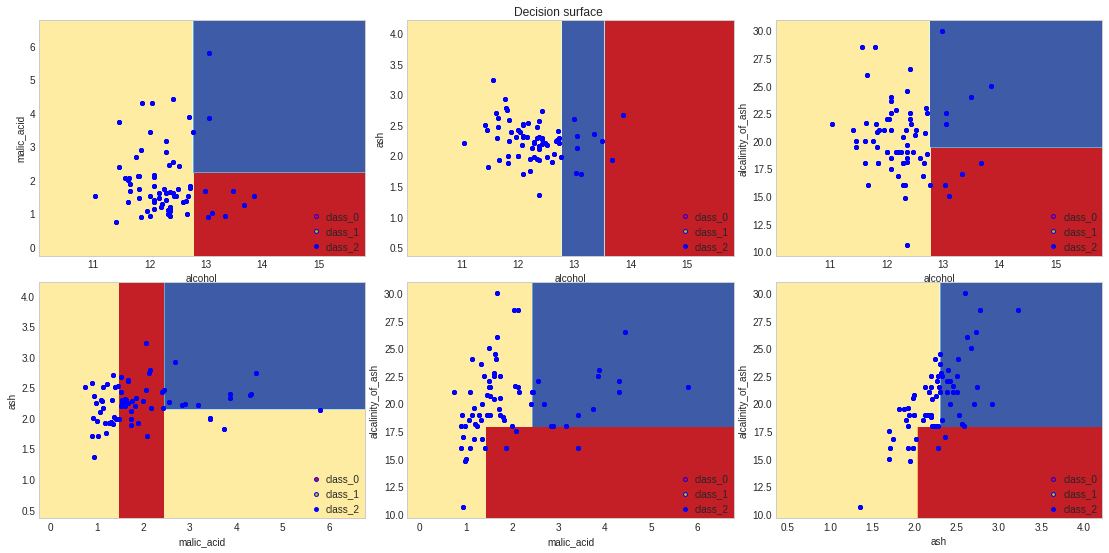

In [41]:
plt.figure(figsize=(16, 8))

for pairIdx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    X = wine.data[:, pair]
    y = wine.target

    model = DecisionTreeClassifier(max_depth=2)
    model.fit(X, y)

    plt.subplot(2, 3, pairIdx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    
    plt.tight_layout(h_pad = -0.5, w_pad = 0.5, pad = 2.5)

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap = plt.cm.RdYlBu)

    plt.xlabel(wine.feature_names[pair[0]])
    plt.ylabel(wine.feature_names[pair[1]])

    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y==1)
        plt.scatter(
            X[idx, 0], 
            X[idx, 1],
            c = color,
            label = wine.target_names[i],
            cmap = plt.cm.RdYlBu,
            edgecolor = 'b',
            s = 15)

    plt.suptitle('Decision surface')
    plt.legend(loc = 'lower right', borderpad = 0, handletextpad = 0)
    plt.axis('tight')

### Breast cancer 데이터 학습

#### 전처리 없이 학습

In [42]:
model = DecisionTreeClassifier()

In [43]:
cross_val = cross_val_score(
    estimator = model,
    X = cancer.data,
    y = cancer.target,
    cv = 5,
    n_jobs = multiprocessing.cpu_count()
)

In [44]:
cross_val

array([0.9122807 , 0.92982456, 0.92982456, 0.92105263, 0.89380531])

In [45]:
cross_val.mean()

0.9173575531749728

#### 전처리 후 학습

In [46]:
model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

In [47]:
cross_val = cross_val_score(
    estimator = model,
    X = cancer.data,
    y = cancer.target,
    cv = 5,
    n_jobs = multiprocessing.cpu_count()
)

In [48]:
cross_val

array([0.90350877, 0.90350877, 0.92105263, 0.93859649, 0.90265487])

In [49]:
cross_val.mean()

0.9138643067846608

### 학습된 Decision tree 시각화

In [50]:
model = DecisionTreeClassifier()
model.fit(cancer.data, cancer.target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### 텍스트를 통한 시각화

In [51]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [52]:
r = tree.export_text(decision_tree=model)
print(r)

|--- feature_20 <= 16.80
|   |--- feature_27 <= 0.14
|   |   |--- feature_28 <= 0.16
|   |   |   |--- class: 0
|   |   |--- feature_28 >  0.16
|   |   |   |--- feature_13 <= 38.60
|   |   |   |   |--- feature_14 <= 0.00
|   |   |   |   |   |--- feature_26 <= 0.19
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_26 >  0.19
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_14 >  0.00
|   |   |   |   |   |--- feature_21 <= 33.27
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_21 >  33.27
|   |   |   |   |   |   |--- feature_21 <= 33.56
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_21 >  33.56
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |--- feature_13 >  38.60
|   |   |   |   |--- feature_13 <= 39.15
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_13 >  39.15
|   |   |   |   |   |--- feature_15 <= 0.01
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- featur

#### plot_tree를 사용한 시각화

[Text(204.01875, 203.85, 'X[20] <= 16.795\ngini = 0.468\nsamples = 569\nvalue = [212, 357]'),
 Text(125.55000000000001, 176.67000000000002, 'X[27] <= 0.136\ngini = 0.159\nsamples = 379\nvalue = [33, 346]'),
 Text(57.54375, 149.49, 'X[28] <= 0.157\ngini = 0.03\nsamples = 333\nvalue = [5, 328]'),
 Text(47.081250000000004, 122.31, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(68.00625000000001, 122.31, 'X[13] <= 38.605\ngini = 0.024\nsamples = 332\nvalue = [4, 328]'),
 Text(41.85, 95.13, 'X[14] <= 0.003\ngini = 0.012\nsamples = 319\nvalue = [2, 317]'),
 Text(20.925, 67.94999999999999, 'X[26] <= 0.195\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(10.4625, 40.77000000000001, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(31.387500000000003, 40.77000000000001, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(62.775000000000006, 67.94999999999999, 'X[21] <= 33.27\ngini = 0.006\nsamples = 312\nvalue = [1, 311]'),
 Text(52.3125, 40.77000000000001, 'gini = 0.0\nsamples = 292\nvalue

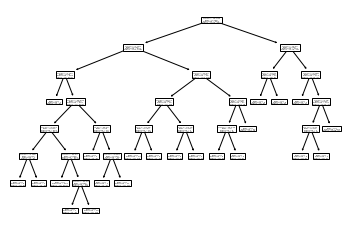

In [53]:
tree.plot_tree(model)

#### graphviz를 사용한 시각화

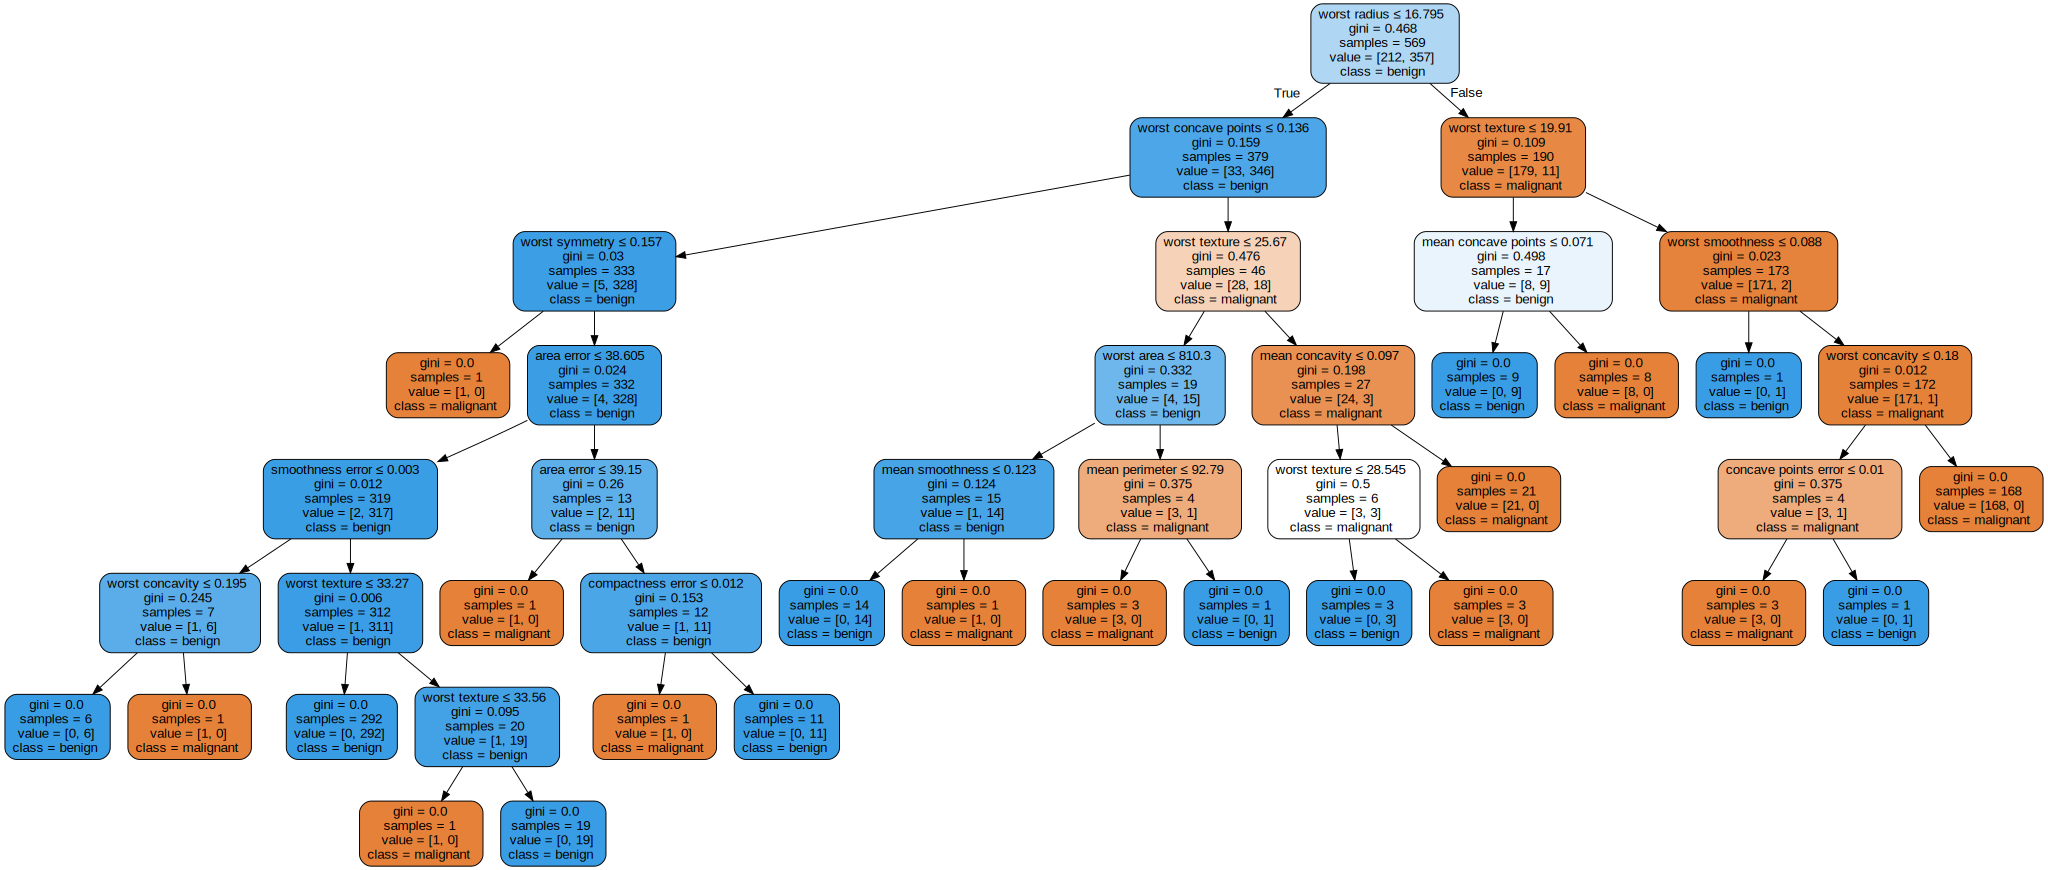

In [54]:
dot_data = tree.export_graphviz(
    decision_tree=model,
    feature_names=cancer.feature_names,
    class_names=cancer.target_names,
    filled=True,
    rounded=True,
    special_characters=True
)

graphviz.Source(dot_data)

### 시각화

In [60]:
n_classes = 2
plot_colors = 'ryb'
plot_step = 0.02

#### 결정 경계 시각화

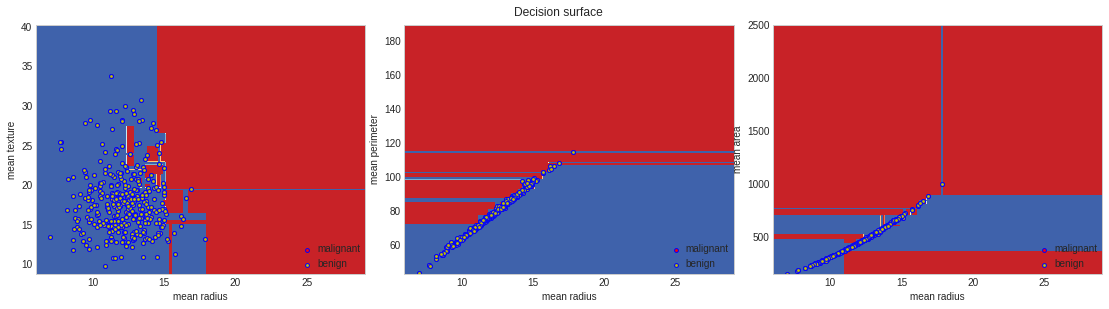

In [61]:
plt.figure(figsize=(16, 8))

for pairIdx, pair in enumerate([[0, 1], [0, 2], [0, 3]]):
    X = cancer.data[:, pair]
    y = cancer.target

    model = DecisionTreeClassifier()
    model.fit(X, y)

    plt.subplot(2, 3, pairIdx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    
    plt.tight_layout(h_pad = -0.5, w_pad = 0.5, pad = 2.5)

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap = plt.cm.RdYlBu)

    plt.xlabel(cancer.feature_names[pair[0]])
    plt.ylabel(cancer.feature_names[pair[1]])

    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y==1)
        plt.scatter(
            X[idx, 0], 
            X[idx, 1],
            c = color,
            label = cancer.target_names[i],
            cmap = plt.cm.RdYlBu,
            edgecolor = 'b',
            s = 15)

    plt.suptitle('Decision surface')
    plt.legend(loc = 'lower right', borderpad = 0, handletextpad = 0)
    plt.axis('tight')

#### 하이퍼파라미터를 변경해 보면서 결정 경계의 변화 확인

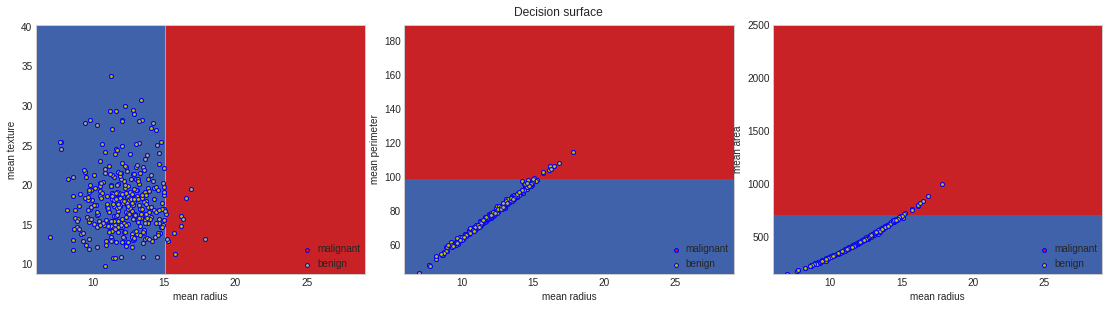

In [62]:
plt.figure(figsize=(16, 8))

for pairIdx, pair in enumerate([[0, 1], [0, 2], [0, 3]]):
    X = cancer.data[:, pair]
    y = cancer.target

    model = DecisionTreeClassifier(max_depth=2)
    model.fit(X, y)

    plt.subplot(2, 3, pairIdx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    
    plt.tight_layout(h_pad = -0.5, w_pad = 0.5, pad = 2.5)

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap = plt.cm.RdYlBu)

    plt.xlabel(cancer.feature_names[pair[0]])
    plt.ylabel(cancer.feature_names[pair[1]])

    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y==1)
        plt.scatter(
            X[idx, 0], 
            X[idx, 1],
            c = color,
            label = cancer.target_names[i],
            cmap = plt.cm.RdYlBu,
            edgecolor = 'b',
            s = 15)

    plt.suptitle('Decision surface')
    plt.legend(loc = 'lower right', borderpad = 0, handletextpad = 0)
    plt.axis('tight')

## 회귀 - DecisionTreeRegressor()

### 보스턴 주택 가격 데이터 학습

#### 교차 검증

#### 전처리 없이 학습

In [63]:
model = DecisionTreeRegressor()

In [64]:
cross_val = cross_val_score(
    estimator = model,
    X = boston.data,
    y = boston.target,
    cv = 5,
    n_jobs = multiprocessing.cpu_count()
)

In [65]:
cross_val

array([ 0.61096522,  0.59144561,  0.62116295,  0.38164311, -1.46481742])

In [66]:
cross_val.mean()

0.14807989255060877

#### 전처리 후 학습

In [67]:
model = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor()
)

In [68]:
cross_val = cross_val_score(
    estimator = model,
    X = boston.data,
    y = boston.target,
    cv = 5,
    n_jobs = multiprocessing.cpu_count()
)

In [69]:
cross_val

array([ 0.60632375,  0.65356827,  0.62522906,  0.42347676, -1.76982744])

In [70]:
cross_val.mean()

0.10775407999539591

### 학습된 Decision tree 시각화

In [71]:
model = DecisionTreeRegressor()
model.fit(boston.data, boston.target)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [75]:
r = tree.export_text(decision_tree=model)
print(r)

|--- feature_5 <= 6.94
|   |--- feature_12 <= 14.40
|   |   |--- feature_7 <= 1.38
|   |   |   |--- feature_0 <= 10.59
|   |   |   |   |--- value: [50.00]
|   |   |   |--- feature_0 >  10.59
|   |   |   |   |--- value: [27.90]
|   |   |--- feature_7 >  1.38
|   |   |   |--- feature_5 <= 6.54
|   |   |   |   |--- feature_12 <= 7.57
|   |   |   |   |   |--- feature_9 <= 222.50
|   |   |   |   |   |   |--- value: [28.70]
|   |   |   |   |   |--- feature_9 >  222.50
|   |   |   |   |   |   |--- feature_2 <= 5.48
|   |   |   |   |   |   |   |--- feature_10 <= 19.95
|   |   |   |   |   |   |   |   |--- feature_11 <= 393.33
|   |   |   |   |   |   |   |   |   |--- feature_2 <= 3.90
|   |   |   |   |   |   |   |   |   |   |--- feature_6 <= 26.05
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- feature_6 >  26.05
|   |   |   |   |   |   |   |   |   |   |   |--- value: [21.90]
|   |   |   |   |   |   |   |   |   |--- featur